# Reprocess Building  spectra for AuxTel

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : April 2nd  2021
- creation update : April 2nd 2021
- version v0

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re

plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
from iminuit import Minuit
import iminuit

In [3]:
iminuit.__version__

'2.2.0'

In [4]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.images import *
from scipy import ndimage, misc

# Function

In [5]:
def file_target(filename):
    m=re.findall('^Cor_holo4_003_.*_(.*)_[0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*[.]fits$',filename)
    if len(m)>0:
        return m
    elif re.search('NGC4755',filename):
        return ['NGC4755']
    else:
        return []

# Logbook for file selection

In [6]:
filename_logbook='logbooks/auxtellogbook_2021_v1.2.csv'

In [7]:
df=pd.read_csv(filename_logbook)

In [8]:
pd.set_option('display.max_rows', None)

In [9]:
df

,Unnamed: 0,index,date,path,file,num,object,filter,disperser,airmass,...,temperature,humidity,windspd,Obj-posXpix,Obj-posYpix,Dx,Dy,skip,run,quality
0,0,0,2021-02-17T01:45:09.091,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_RG610_HD50896_2021-02-16_181.fits,181,HD50896,RG610,holo4_003,1.006209,...,10.3,51.0,9.3,NaN,NaN,NaN,NaN,,NaN,NaN
1,1,1,2021-02-17T03:37:12.647,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_empty_HD50896_2021-02-16_209.fits,209,HD50896,empty_1,holo4_003,1.099905,...,10.4,45.0,9.9,NaN,NaN,NaN,NaN,,NaN,NaN
2,2,2,2021-02-18T07:25:02.387,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_350.fits,350,NGC4755,empty_1,holo4_003,1.158253,...,8.8,53.0,7.3,750.0,2700.0,NaN,NaN,,1.0,1.0
3,3,3,2021-02-18T07:25:46.560,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_351.fits,351,NGC4755,empty_1,holo4_003,1.158097,...,8.8,54.0,6.3,750.0,2700.0,NaN,NaN,,1.0,1.0
4,4,4,2021-02-18T07:26:07.146,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_352.fits,352,NGC4755,empty_1,holo4_003,1.158027,...,8.8,54.0,6.3,750.0,2700.0,NaN,NaN,,1.0,1.0
5,5,5,2021-02-18T07:26:18.957,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_353.fits,353,NGC4755,empty_1,holo4_003,1.157987,...,8.8,55.0,7.7,750.0,2700.0,NaN,NaN,,1.0,1.0
6,6,6,2021-02-18T07:26:43.049,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_354.fits,354,NGC4755,empty_1,holo4_003,1.157907,...,8.8,55.0,7.7,750.0,2700.0,NaN,NaN,,1.0,1.0
7,7,7,2021-02-18T07:26:51.615,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_355.fits,355,NGC4755,empty_1,holo4_003,1.157879,...,8.8,55.0,7.7,750.0,2700.0,NaN,NaN,,1.0,1.0
8,8,8,2021-02-18T07:27:00.190,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_356.fits,356,NGC4755,empty_1,holo4_003,1.157851,...,8.8,55.0,7.7,750.0,2700.0,NaN,NaN,,1.0,1.0
9,9,9,2021-02-18T07:27:53.863,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_357.fits,357,NGC4755,empty_1,holo4_003,1.157723,...,8.7,55.0,6.7,700.0,1700.0,NaN,NaN,,1.0,1.0


# Selection of input file

In [10]:
index_sel=2 # SELECTION

In [11]:
myhome=os.getenv("HOME")

In [12]:
dir_spectra=os.path.join(myhome,"DATA/AuxTelData2021/holo/FlipCleans")

In [13]:
filename_image=df["file"][index_sel]

In [14]:
file_target(filename_image)

['NGC4755']

In [15]:
xpos=df["Obj-posXpix"][index_sel]
ypos=df["Obj-posYpix"][index_sel]

In [33]:
filename=os.path.join(dir_spectra,filename_image)
output_directory="./outputs_reprocess/"
output_figures="figures_reprocess"
guess = [xpos,ypos]
disperser_label = df["disperser"][index_sel]
config = "config/auxtel_quicklook.ini"
#config = "config/auxtel.ini"
target = file_target(filename_image)[0]

In [38]:
os.path.isdir(output_directory)

True

In [39]:
if not os.path.isdir(output_directory):
    os.mkdir(output_directory)
if not os.path.isdir(output_figures):
    os.mkdir(output_figures)

In [17]:
#spectractor_dir="/Users/dagoret/MacOSX/GitHub/LSST/SpectractorNew/spectractor"

# Configuration of the running mode

In [18]:
parameters.debug=True
parameters.verbose=True
parameters.display=True
parameters.LIVE_FIT=False

In [19]:
#parameters.DISPERSER_DIR = os.path.join(spectractor_dir, "extractor/dispersers/")
#parameters.CONFIG_DIR = os.path.join(spectractor_dir, "../config/")
#parameters.THROUGHPUT_DIR = os.path.join(spectractor_dir, "simulation/CTIOThroughput/")

# Load an image

In [20]:
image=Image(file_name=filename, target_label=target, disperser_label=disperser_label, config=config)

## Show relevant parameters

In [21]:
parameters.OBS_NAME

'AUXTEL'

In [22]:
parameters.DISPERSER_DIR

'/Users/sylvie/.local/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/extractor/dispersers/'

In [23]:
parameters.DISTANCE2CCD

174.9980010986328

In [24]:
parameters.LAMBDA_MIN 

300

In [25]:
parameters.LAMBDA_MAX 

1100

In [26]:
parameters.LSST_SAVEFIGPATH=True
parameters.LSST_SAVEFIGPATH="figures_reprocess"

In [27]:
image.filter_label

''

In [28]:
image.header["FILTER"]

'empty_1'

# Plot image and find the target position

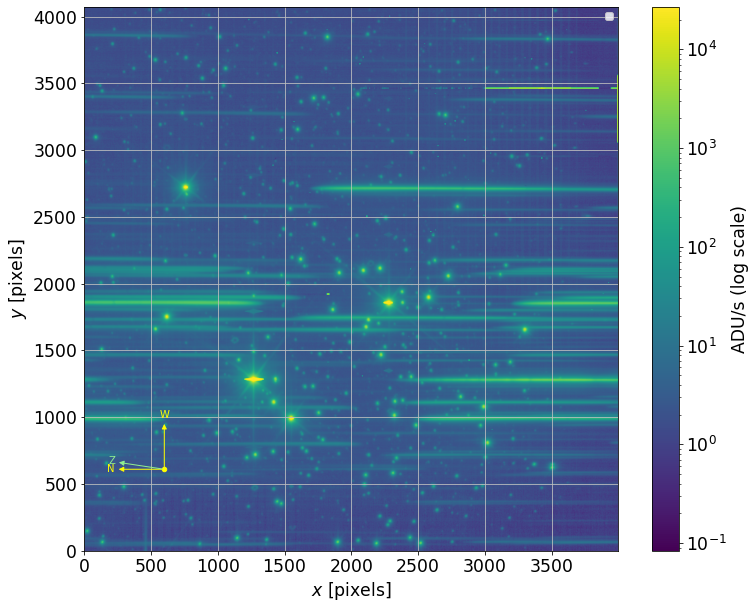

In [29]:
image.plot_image(figsize=(12, 10),scale="log")

# Find target

2021-04-06 17:38:35  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0                c1_0                c0_1       
    ------------------ ------------------- -------------------
    6.6408009260257925 0.01659471833470085 0.04082495651098077
2021-04-06 17:38:37  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 12 iterations because the sum of parameter shift relative to the sum of the parameters is below xtol=1e-06.


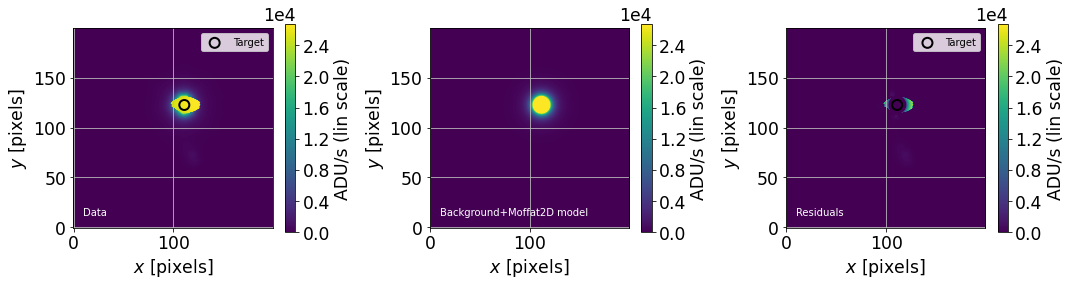

2021-04-06 17:38:38  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 1 iterations because the relative change of cost is below ftol=5e-05.


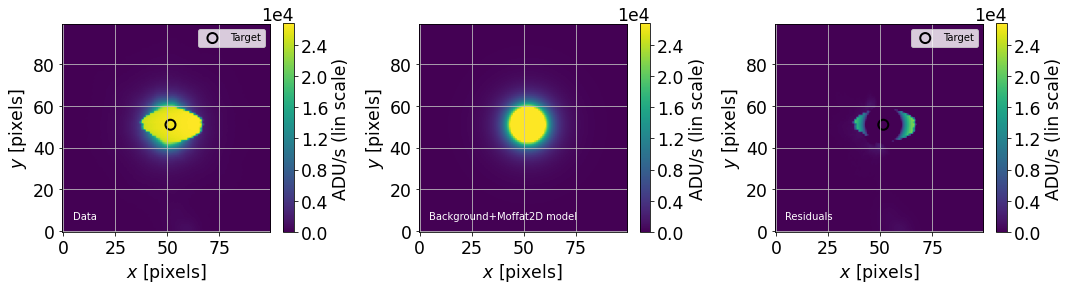

In [30]:
parameters.VERBOSE = True
parameters.DEBUG = True
x1, y1 = find_target(image, guess,rotated=False, use_wcs=False)

In [31]:
print(x1,y1)

761.5273396773811 2722.9372398307983


# Go for spectrum reconstruction

2021-04-06 17:38:39  spectractor.extractor.extractor Spectractor          INFO   
	Start SPECTRACTOR
2021-04-06 17:38:39  Image      load_AUXTEL_image    INFO   
	Loading AUXTEL image /Users/sylvie/DATA/AuxTelData2021/holo/FlipCleans/Cor_holo4_003_NGC4755_2021-02-17_350.fits...
2021-04-06 17:38:39  Image      load_AUXTEL_image    INFO   
	Image loaded


Section: paths
x disperser_dir: extractor/dispersers/	=> parameters.DISPERSER_DIR: /Users/sylvie/.local/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/extractor/dispersers/	 <class 'str'>
x throughput_dir: simulation/AuxTelThroughput/	=> parameters.THROUGHPUT_DIR: /Users/sylvie/.local/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/simulation/AuxTelThroughput/	 <class 'str'>
Section: instrument
x obs_name: AUXTEL	=> parameters.OBS_NAME: AUXTEL	 <class 'str'>
x obs_altitude: 2.66299616375123	=> parameters.OBS_ALTITUDE: 2.66299616375123	 <class 'float'>
x obs_latitude: -30.2446389756252	=> parameters.OBS_LATITUDE: -30.2446389756252	 <class 'float'>
x obs_diameter: 1.20	=> parameters.OBS_DIAMETER: 1.2 m	 <class 'astropy.units.quantity.Quantity'>
x obs_epoch: J2000.0	=> parameters.OBS_EPOCH: J2000.0	 <class 'str'>
x obs_transmission_systematics: 0.005	=> parameters.OBS_TRANSMISSION_SYSTEMATICS: 0.005	 <class 'float'>
x obs_object_type: STAR	=> parameter

2021-04-06 17:38:39  Image      load_image           INFO   
	Loading disperser holo4_003...
2021-04-06 17:38:39  Hologram   load_specs           INFO   
	Load disperser holo4_003:
	from /Users/sylvie/.local/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/extractor/dispersers/holo4_003
2021-04-06 17:38:39  Hologram   load_specs           INFO   
	Grating characteristics:
	N = 156.00 +/- 1.00 grooves/mm
	Average tilt of -0.3 degrees
2021-04-06 17:38:43  urllib3.connectionpool _new_conn            DEBUG  Starting new HTTP connection (1): simbad.u-strasbg.fr:80
2021-04-06 17:38:43  urllib3.connectionpool _make_request        DEBUG  http://simbad.u-strasbg.fr:80 "POST /simbad/sim-script HTTP/1.1" 200 None
2021-04-06 17:38:43  Star       load                 INFO   
	Simbad:
 MAIN_ID     RA      DEC    RA_PREC ... PM_ERR_MINA_2 PM_ERR_ANGLE_2 Z_VALUE_2 
          "h:m:s"  "d:m:s"          ...    mas / yr        deg                 
--------- -------- -------- ------- ... -

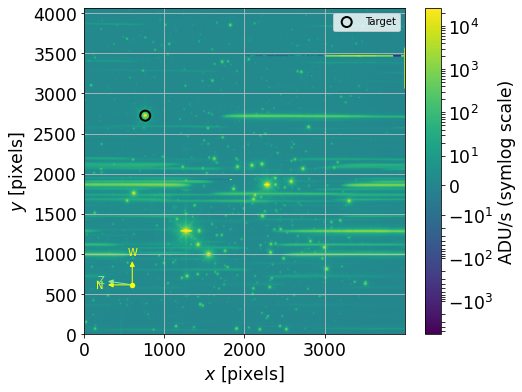

2021-04-06 17:38:46  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the image with guess=[ 761.52733968 2722.93723983]...
2021-04-06 17:38:46  spectractor.extractor.images find_target          INFO   
	No WCS /Users/sylvie/DATA/AuxTelData2021/holo/FlipCleans/Cor_holo4_003_NGC4755_2021-02-17_350_wcs/Cor_holo4_003_NGC4755_2021-02-17_350.wcs available, use 2D fit to find target pixel position.
2021-04-06 17:38:46  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0                 c1_0                  c0_1        
    ------------------ --------------------- ---------------------
    12.955378574886398 -0.004765156977616993 -0.002222752077381622
2021-04-06 17:38:46  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 12 iterations because the relative change of cost is below ftol=1.25e-05.


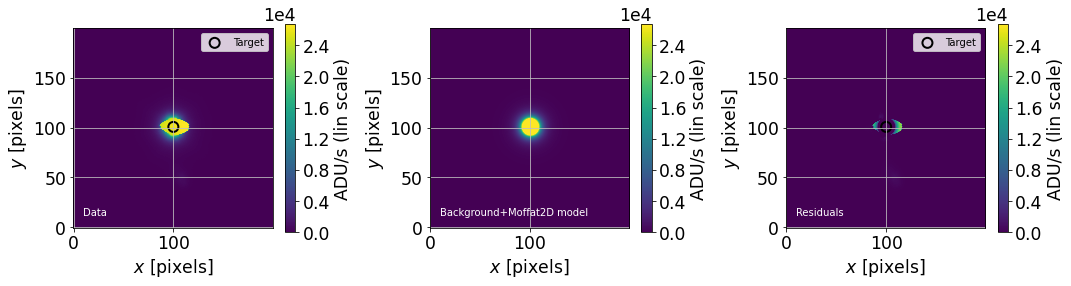

2021-04-06 17:38:47  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 2 iterations because the sum of parameter shift relative to the sum of the parameters is below xtol=1e-06.


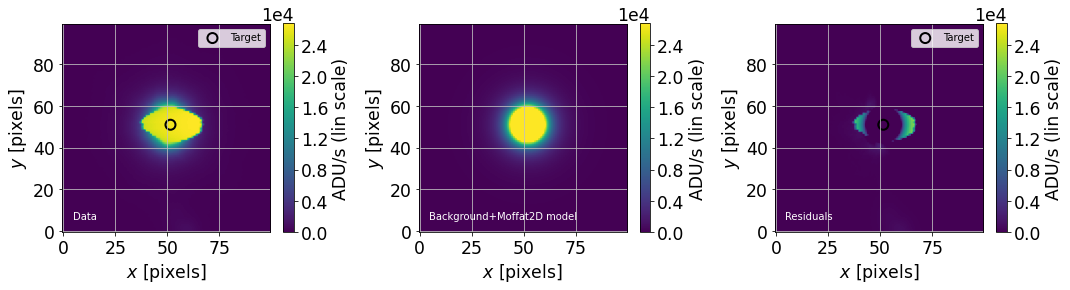

2021-04-06 17:38:48  Image      find_target          INFO   
	X,Y target position in pixels: 761.525,2722.936


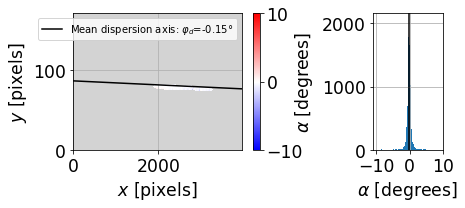

2021-04-06 17:38:49  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.15 degree
/Users/sylvie/.local/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/tools.py:1713: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(vmin=vmin, vmax=vmax, linthresh=10)


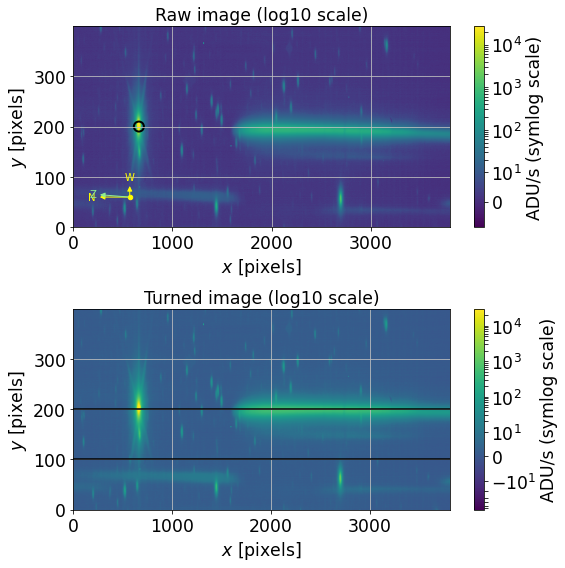

2021-04-06 17:38:58  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the rotated image...
2021-04-06 17:38:59  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
          c0_0               c1_0                c0_1        
    ---------------- ------------------- --------------------
    92.2714794146264 0.13973833061814386 -0.12979615270378053
2021-04-06 17:38:59  Image      find_target_init     DEBUG  
	4 saturated pixels: set saturation level to 28333.333333333332 ADU/s.
2021-04-06 17:38:59  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 8 iterations because the relative change of cost is below ftol=5e-05.


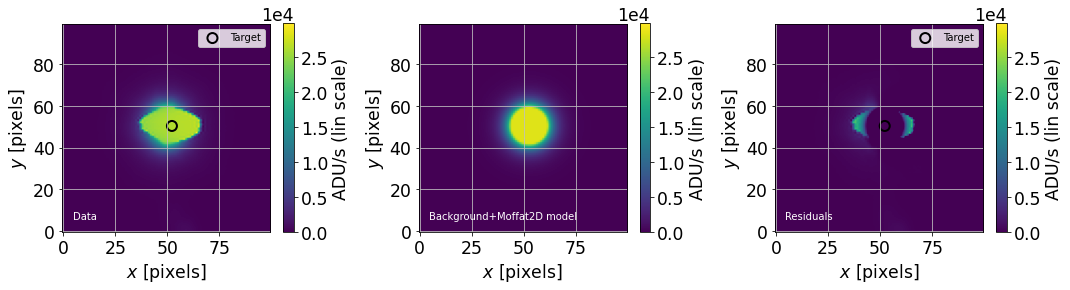

2021-04-06 17:38:59  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 6 iterations because the relative change of cost is below ftol=0.0002.


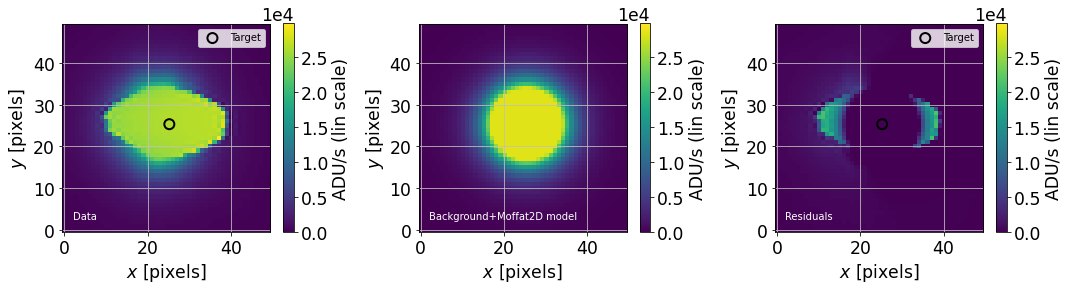

2021-04-06 17:39:00  Image      find_target          INFO   
	X,Y target position in pixels: 766.235,2724.352
2021-04-06 17:39:00  Spectrum   __init__             INFO   
	Spectrum info copied from image
2021-04-06 17:39:00  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*20 pixels and background from 140 to 180 pixels
2021-04-06 17:39:00  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extract spectrogram: crop rotated image [1586:3814,2544:2904] (size (2228, 360))


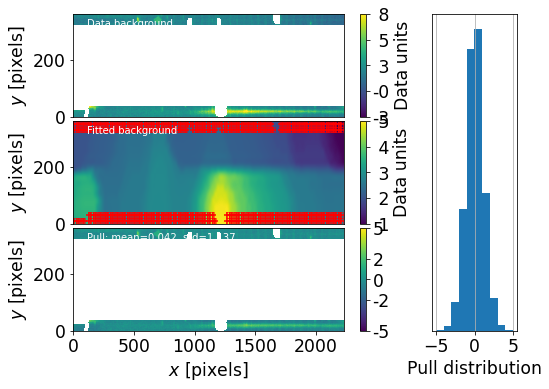

2021-04-06 17:39:03  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Start PSF1D transverse fit...
/Users/sylvie/anaconda3/lib/python3.8/site-packages/matplotlib/image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/Users/sylvie/anaconda3/lib/python3.8/site-packages/matplotlib/image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/Users/sylvie/anaconda3/lib/python3.8/site-packages/matplotlib/image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/Users/sylvie/anaconda3/lib/python3.8/site-packages/matplotlib/image.py:477: UserWarning: Warning: converting a masked element to nan.
  vrange = np.array([self.norm.vmin, self.norm.vmax],


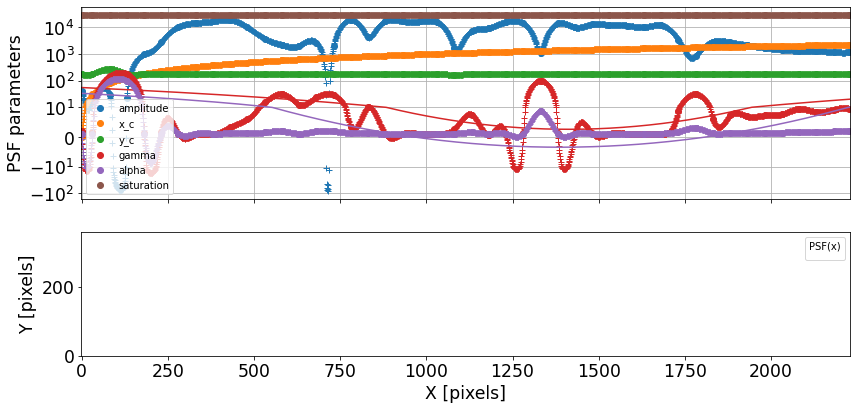

2021-04-06 17:39:29  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=3.0495e+07 initial chisq_red=342.17
		 Line search: alpha_min=0.0788 iter=5 funcalls=9
	Parameter shifts: [-0.01281151  0.00506705  0.00101484 -0.05868383 -0.03009316  0.00474018
 -0.11828333 -0.05297269 -0.04341803]
	New parameters: [-2.04335167  0.99714653  0.10109976  1.8119689  -1.37034597 -0.04100542
  1.06473787 -0.08865041  0.03538741]
	Final cost=2.9219e+07 final chisq_red=327.86 computed in 2.44s
2021-04-06 17:39:31  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=1: initial cost=2.9219e+07 initial chisq_red=327.86
		 Line search: alpha_min=2.62 iter=1 funcalls=7
	Parameter shifts: [-0.46589822  0.27000019  0.04855093  3.07534468 -1.14309694 -1.83382702
 -0.96779168 -0.38310251 -1.14324467]
	New parameters: [-2.50924989  1.26714672  0.14965069  4.88731358 -2.51344291 -1.87483244
  0.09694619 -0.47175292 -1.10785726]
	Final cost=5.966e+06 final chisq_red=66.943 com

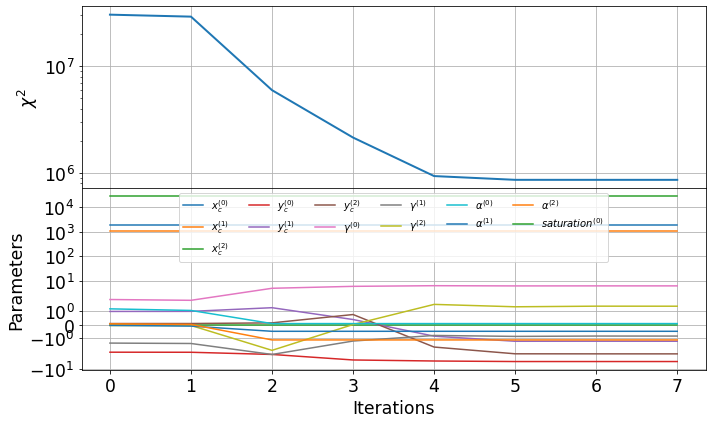

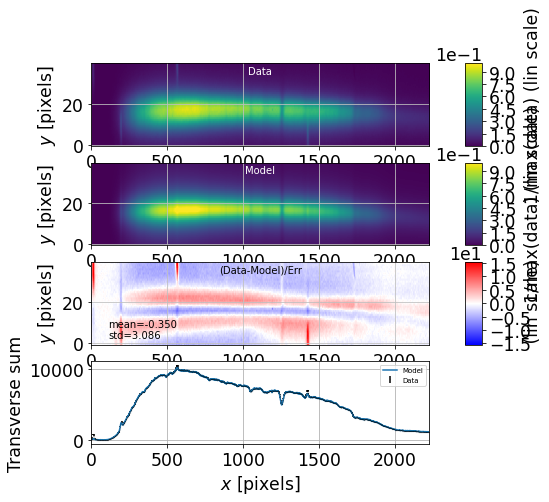

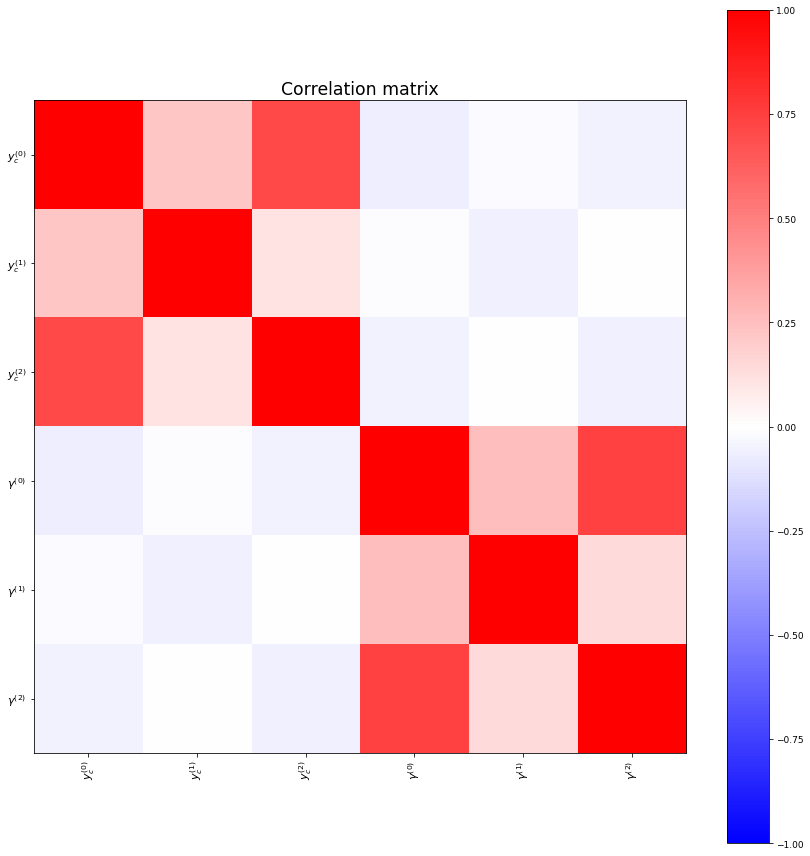

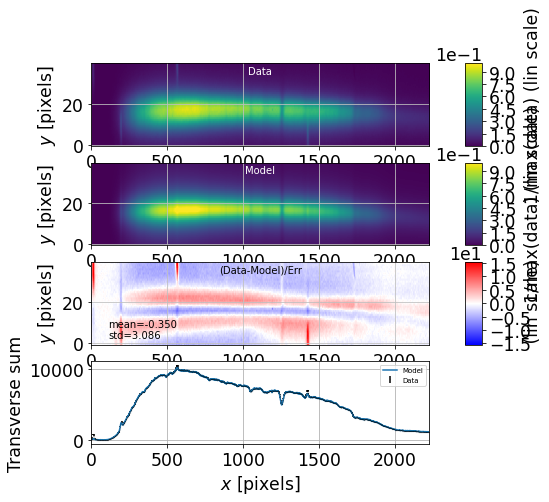

2021-04-06 17:39:48  spectractor.extractor.extractor extract_spectrum_from_image DEBUG  
	Transverse fit table before derotation:
    amplitude       x_c          y_c         ...         Dy         Dy_disp_axis
------------------ ------ ------------------ ... ------------------ ------------
38.670606989247844    0.0    174.28322961054 ... -6.068341811200128          0.0
 43.24627726108335    1.0  174.2885466753976 ... -6.063024746342506          0.0
49.420854108059686    2.0 174.29385799101894 ... -6.057713430721179          0.0
58.120047385358376    3.0 174.29916355740394 ... -6.052407864336175          0.0
50.646843668506655    4.0 174.30446337455263 ... -6.047108047187493          0.0
  52.8451125165502    5.0 174.30975744246498 ... -6.041813979275133          0.0
 91.31436605330693    6.0 174.31504576114105 ... -6.036525660599068          0.0
  89.8686432740492    7.0  174.3203283305808 ... -6.031243091159325          0.0
100.47869318075516    8.0  174.3256051507842 ... -6.02596627

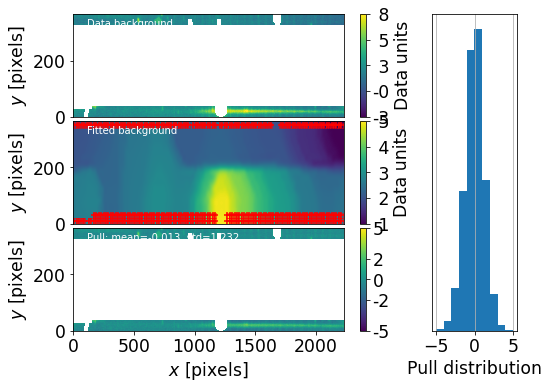

2021-04-06 17:39:50  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Background statistics: mean=2.468 ADU/s, RMS=1.682 ADU/s.
2021-04-06 17:39:50  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extract spectrogram: crop image [1580:3808,2535:2901] (size (2228, 366))
	New target position in spectrogram frame: [-818.4750449778434, 187.935958043965]


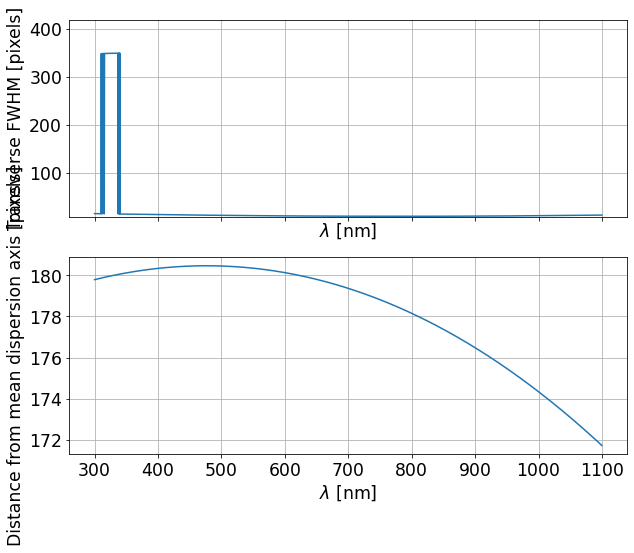

/Users/sylvie/.local/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/tools.py:1713: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(vmin=vmin, vmax=vmax, linthresh=10)


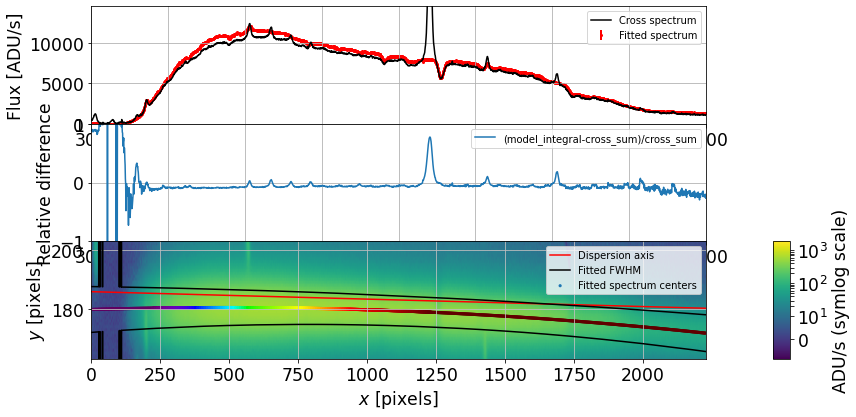

2021-04-06 17:39:52  spectractor.extractor.extractor Spectractor          INFO   
	Calibrating order 1 spectrum...


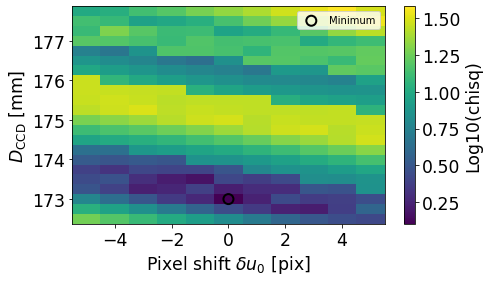

2021-04-06 17:40:17  Spectrum   calibrate_spectrum   INFO   
	Order0 total shift: 0.000pix
	D = 173.007 mm (default: DISTANCE2CCD = 175.00 +/- 0.50 mm, -4.0 sigma shift)
2021-04-06 17:40:17  astropy    _showwarning         WARNING VerifyWarning: Card is too long, comment will be truncated.
2021-04-06 17:40:17  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./outputs_reprocess/Cor_holo4_003_NGC4755_2021-02-17_350_spectrum.fits
2021-04-06 17:40:17  Spectrum   save_spectrogram     INFO   
	Spectrogram saved in ./outputs_reprocess/Cor_holo4_003_NGC4755_2021-02-17_350_spectrogram.fits


   Line   Tabulated  Detected ...   Chisq    Eqwidth_mod  Eqwidth_data
              nm        nm    ...  reduced        nm           nm     
--------- --------- --------- ... ---------- ------------ ------------
 $He_{I}$     388.8 392.97372 ...  26.494482   -0.3671866     -1.56352
$H\delta$     410.2 403.97006 ...  26.494482   -2.3768501  0.112927586
$H\gamma$     434.0  428.9043 ...   2.039901 -0.086430326  -0.13953142
 $He_{I}$     447.1 450.54123 ...   2.039901  -0.57517266   -2.1264703
$Fe_{II}$     463.8 461.15945 ...   2.039901   -0.7343405   -1.9930859
$He_{II}$     468.6 472.44745 ...   2.039901  -0.60055166   -1.8527439
 $H\beta$     486.3 480.54187 ...   2.039901 -0.104807675   -0.4997114
$Fe_{II}$     515.8  512.4811 ...   2.039901   -0.5318525   -0.7834419
$Fe_{II}$     527.3 523.78406 ...   2.039901  -0.19387622   -0.7560954
$C_{III}$     570.0  576.2771 ... 0.98225904   -0.3208148  -0.70732224
      ...       ...       ... ...        ...          ...          ...
      

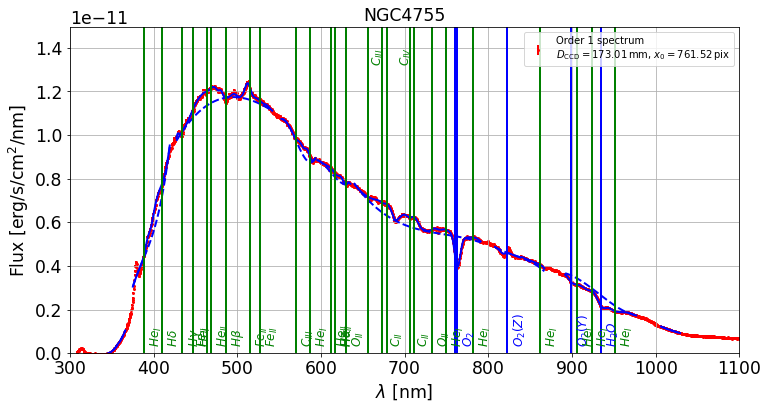

In [32]:
spectrum = Spectractor(filename, output_directory, guess=[x1,y1], target_label=target, disperser_label=disperser_label, config=config)